In [1]:
library(Seurat)

Attaching SeuratObject



In [2]:
obj = readRDS('~/pollock/tests/data/dummy.rds')
obj

An object of class Seurat 
27131 features across 1000 samples within 1 assay 
Active assay: RNA (27131 features, 0 variable features)

In [4]:
pbmc <- CreateSeuratObject(counts = obj@assays$RNA@data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

An object of class Seurat 
15962 features across 997 samples within 1 assay 
Active assay: RNA (15962 features, 0 variable features)

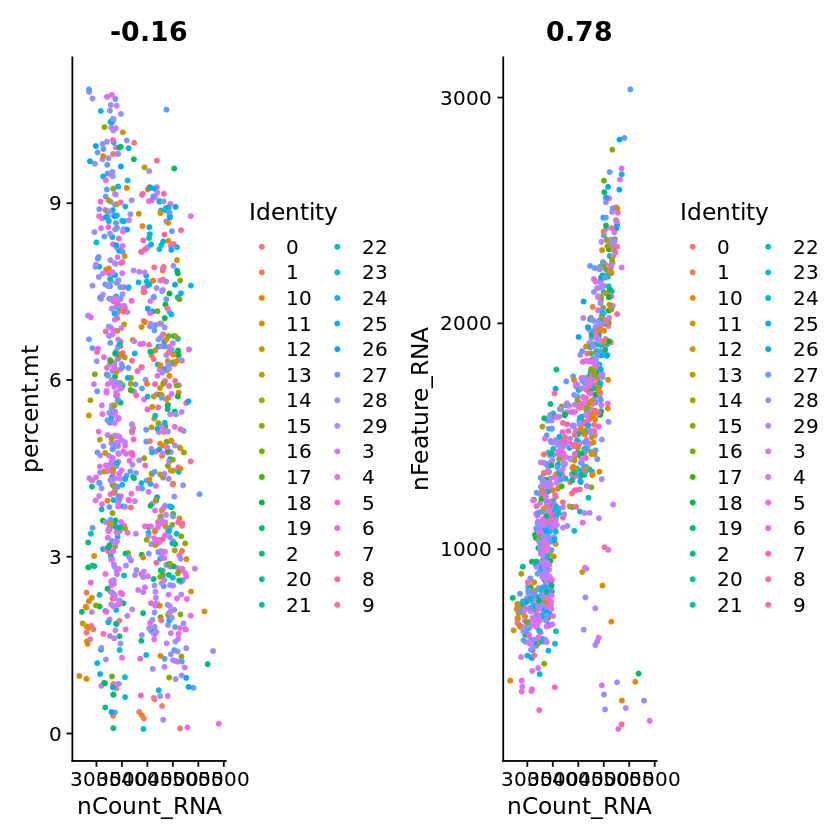

In [5]:
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [6]:
pbmc <- NormalizeData(pbmc)

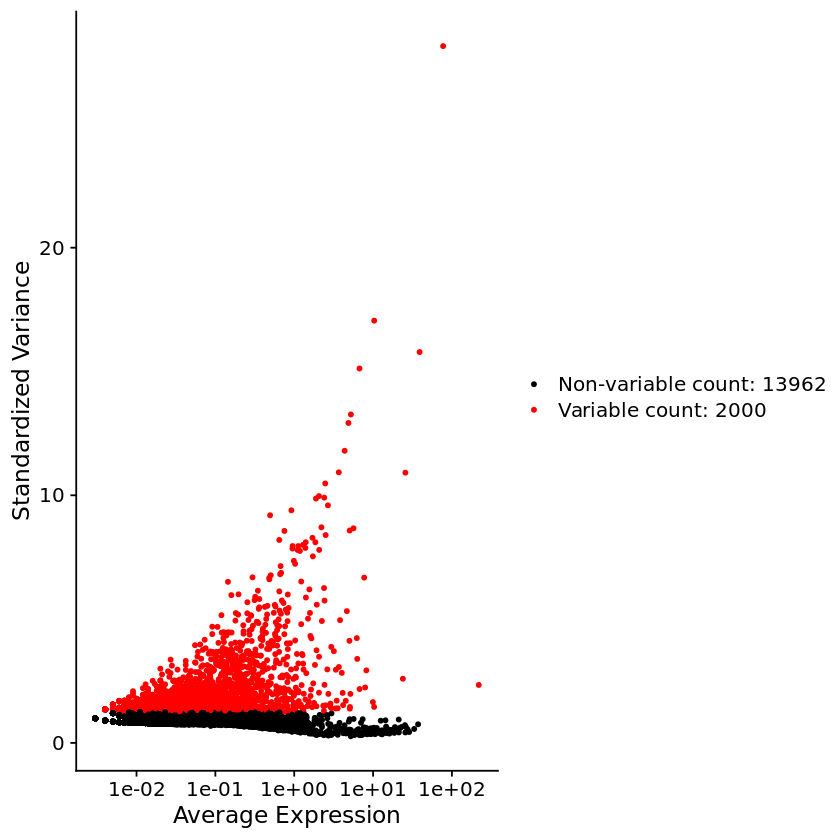

In [8]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
# plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1

In [9]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [10]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  SRGN, CXCR4, DUSP2, RGS1, LTB, CD2, TRAC, SAMSN1, CD69, CD3D 
	   TRBC2, CCL5, RGS2, ZNF331, BIRC3, CD3G, TNFAIP3, S100A4, CREM, EZR 
	   CD7, TYROBP, GZMA, SMCHD1, TRBC1, NKG7, FCER1G, SELL, GPR65, IGKC 
Negative:  IGFBP7, CALD1, SPARC, IGFBP4, SPARCL1, CAVIN1, HSPG2, UACA, CNN3, COL4A1 
	   LAMA4, HTRA1, A2M, COL4A2, CAV1, TIMP3, GNG11, CAVIN3, COL6A2, MYL9 
	   BGN, PRSS23, ESAM, MMP2, SERPINH1, MGP, GSN, COL18A1, LAMB1, FSTL1 
PC_ 2 
Positive:  IL32, TRAC, CD3D, CD2, ITM2A, TRBC2, CD3G, SYNE2, GIMAP7, SPOCK2 
	   SOX18, TRBC1, RAMP2, NPDC1, EMCN, EGFL7, MALAT1, CDH5, ADGRL4, ECSCR 
	   TM4SF1, CLEC14A, CD247, VWF, ESAM, CD27, PLVAP, ARHGAP29, LTB, CXorf36 
Negative:  AIF1, LYZ, FCGR2A, CD14, CD68, MS4A7, FCGR3A, MS4A6A, CTSB, GPNMB 
	   C5AR1, MS4A4A, FTL, MNDA, IGSF6, C1QA, OLR1, C1QC, C1QB, CSF1R 
	   FPR3, SPI1, FCGR1A, TYROBP, TREM2, CD163, NCF2, PSAP, GRN, MAFB 
PC_ 3 
Positive:  LUM, DCN, COL1A2, SFRP2, COL1A1, COL3A1, CTSK, COL6A1, AEBP1, MXRA8 
	   COL12A1

In [11]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 997
Number of edges: 26745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8992
Number of communities: 10
Elapsed time: 0 seconds


In [12]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:42:09 UMAP embedding parameters a = 0.9922 b = 1.112

11:42:09 Read 997 rows and found 10 numeric columns

11:42:09 Using Annoy for neighbor search, n_neighbors = 30

11:42:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:42:09 Writing NN index file to temp file /tmp/RtmpsfoUEe/file45b791cc8f2

11:42:09 Searching Annoy index using 1 thread, search_k = 3000

11:42:10 Annoy recall = 100%

11:42:10 Commencing smooth kNN distance calibration using 1 thread

11:42:10 Initializing from 

In [13]:
saveRDS(pbmc, file = "~/pollock/tests/data/dummy_norm.rds")

In [14]:
library(SeuratDisk)

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [15]:
diet <- DietSeurat(obj, assay = 'RNA')

for (col in colnames(diet@meta.data)) {
    if (!is.null(as.numeric(as.character(diet[[col]][1])))) {
        diet@meta.data[[col]] = as.character(diet@meta.data[[col]])
    }
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [16]:
diet

An object of class Seurat 
27131 features across 1000 samples within 1 assay 
Active assay: RNA (27131 features, 0 variable features)

In [17]:
SaveH5Seurat(diet, filename = '~/pollock/tests/data/dummy_norm.H5Seurat')
Convert('~/pollock/tests/data/dummy_norm.H5Seurat', dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [28]:
Convert('/home/estorrs/pollock/tests/data/dummy.h5ad',
        dest = "h5seurat", overwrite = TRUE, verbose = TRUE)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var



In [20]:
a = readRDS('~/pollock/tests/data/output.rds')
a

An object of class Seurat 
19014 features across 1000 samples within 1 assay 
Active assay: RNA (19014 features, 0 variable features)
 3 dimensional reductions calculated: emb, prediction_probs, umap

In [21]:
a@meta.data

,cell_type,barcode,sample,n_counts,size_factors,y_pred,predicted_cell_type_probability,predicted_cell_type,probability.B.cell,probability.CD4.T.cell,⋯,probability.Dendritic,probability.Endothelial,probability.Erythrocyte,probability.Fibroblast,probability.Malignant,probability.Mast,probability.Monocyte,probability.NK,probability.Plasma,probability.Treg
,<fct>,<chr>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5_CCTACGTTCTTGAGCA-1,CD8 T cell,CCTACGTTCTTGAGCA-1,5,3694,0.9995941,2,0.9937834,CD8 T cell,1.188413e-03,4.932359e-04,⋯,1.967030e-04,1.014505e-04,5.761475e-04,4.396978e-05,4.327663e-04,1.017034e-03,9.790761e-04,0.0004537790,2.366710e-04,4.975154e-04
18_CTTTCGGGTGGACTAG-1,Mast,CTTTCGGGTGGACTAG-1,18,4613,1.2482749,8,0.9913496,Mast,1.177449e-03,7.093837e-04,⋯,9.994091e-04,5.872899e-04,9.138267e-04,7.230457e-05,6.471226e-04,9.913496e-01,4.552269e-04,0.0010633609,3.356250e-05,7.616581e-04
19_GAGACCCGTCTCTCAC-1,CD8 T cell,GAGACCCGTCTCTCAC-1,19,4025,1.0891625,2,0.9942267,CD8 T cell,1.129066e-03,5.634305e-04,⋯,1.784042e-04,8.699697e-05,4.975821e-04,4.080523e-05,4.032741e-04,8.422214e-04,9.519077e-04,0.0004181380,2.179622e-04,4.435390e-04
27_ACACAGTAGGAACGCT-1,Endothelial,ACACAGTAGGAACGCT-1,27,4090,1.1067514,4,0.9924433,Endothelial,1.842740e-04,3.816746e-04,⋯,2.291876e-05,9.924433e-01,1.651610e-03,4.299849e-04,4.888304e-04,6.022223e-04,5.927720e-04,0.0013891525,4.366538e-04,1.091507e-03
26_TGTGATGCACATCCCT-1,Endothelial,TGTGATGCACATCCCT-1,26,4107,1.1113516,4,0.9926811,Endothelial,1.576825e-04,4.447157e-04,⋯,1.881539e-05,9.926811e-01,1.465003e-03,5.312521e-04,5.518630e-04,5.620669e-04,5.422615e-04,0.0013235576,4.683093e-04,1.016906e-03
27_GCCATTCTCTTGGAAC-1,Erythrocyte,GCCATTCTCTTGGAAC-1,27,3983,1.0777973,5,0.9924281,Erythrocyte,8.870944e-04,1.506964e-04,⋯,2.961761e-04,1.014447e-03,9.924281e-01,9.771993e-04,8.910501e-04,1.170416e-03,3.506721e-04,0.0003834503,6.576545e-04,1.452053e-04
28_TCTCCGATCGTTGTGA-1,NK,TCTCCGATCGTTGTGA-1,28,3367,0.9111081,10,0.9962960,NK,1.156175e-03,3.920910e-04,⋯,4.379206e-04,2.175834e-04,6.242394e-05,1.579531e-04,1.204674e-04,3.459965e-04,2.379689e-04,0.9962959886,6.910083e-05,3.227703e-04
23_CAATTTCCACAGTCGC-1,Mast,CAATTTCCACAGTCGC-1,23,4226,1.1435530,8,0.9919339,Mast,1.037562e-03,5.991345e-04,⋯,1.157400e-03,4.610060e-04,8.382283e-04,5.927628e-05,6.571281e-04,9.919339e-01,4.121326e-04,0.0010462940,3.146375e-05,6.642254e-04
3_CGAGGAAGTATATGGA-1,CD4 T cell,CGAGGAAGTATATGGA-1,3,3416,0.9243675,1,0.2923100,CD4 T cell,4.501770e-02,2.923100e-01,⋯,5.005383e-02,1.688108e-02,1.074999e-02,1.885133e-02,1.290818e-01,6.684487e-02,1.119683e-02,0.1483103484,4.343552e-02,1.252233e-01


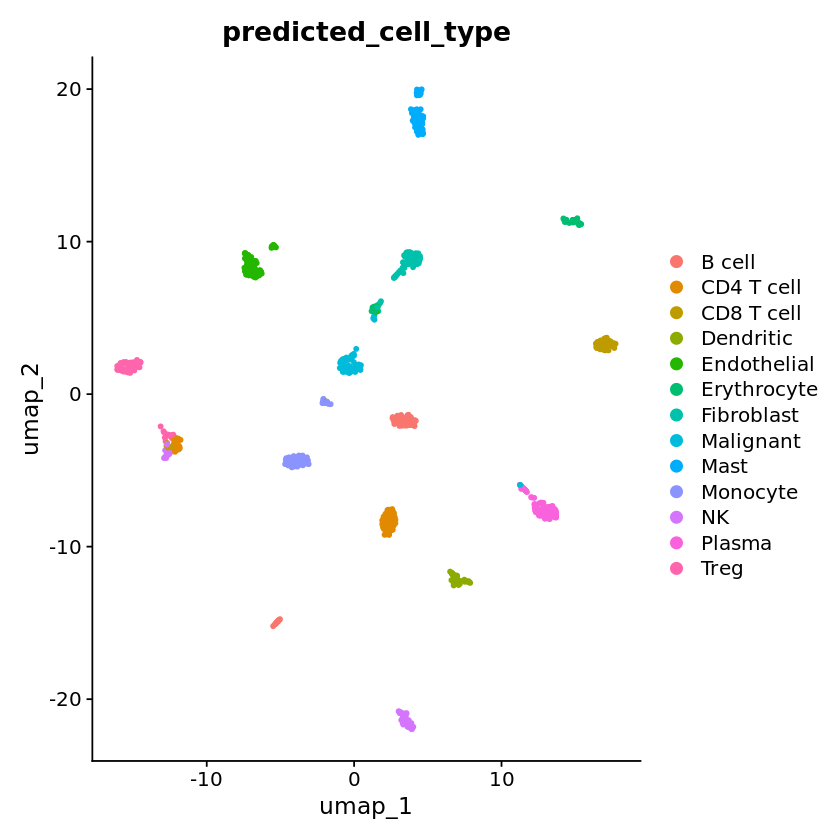

In [23]:
DimPlot(object = a, group.by = 'predicted_cell_type')

In [31]:
b <- LoadH5Seurat('~/pollock/tests/data/dummy.h5seurat', verbose = TRUE)

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [32]:
b

An object of class Seurat 
27131 features across 1000 samples within 1 assay 
Active assay: RNA (27131 features, 0 variable features)

In [36]:
b@meta.data

,cell_type,barcode,sample
,<fct>,<fct>,<int>
5_CCTACGTTCTTGAGCA-1,CD8 T cell,CCTACGTTCTTGAGCA-1,5
18_CTTTCGGGTGGACTAG-1,Mast,CTTTCGGGTGGACTAG-1,18
19_GAGACCCGTCTCTCAC-1,CD8 T cell,GAGACCCGTCTCTCAC-1,19
27_ACACAGTAGGAACGCT-1,Endothelial,ACACAGTAGGAACGCT-1,27
26_TGTGATGCACATCCCT-1,Endothelial,TGTGATGCACATCCCT-1,26
27_GCCATTCTCTTGGAAC-1,Erythrocyte,GCCATTCTCTTGGAAC-1,27
28_TCTCCGATCGTTGTGA-1,NK,TCTCCGATCGTTGTGA-1,28
23_CAATTTCCACAGTCGC-1,Mast,CAATTTCCACAGTCGC-1,23
3_CGAGGAAGTATATGGA-1,CD4 T cell,CGAGGAAGTATATGGA-1,3


In [39]:
b@meta.data[row.names(a@meta.data),]

,cell_type,barcode,sample
,<fct>,<fct>,<int>
5_CCTACGTTCTTGAGCA-1,CD8 T cell,CCTACGTTCTTGAGCA-1,5
18_CTTTCGGGTGGACTAG-1,Mast,CTTTCGGGTGGACTAG-1,18
19_GAGACCCGTCTCTCAC-1,CD8 T cell,GAGACCCGTCTCTCAC-1,19
27_ACACAGTAGGAACGCT-1,Endothelial,ACACAGTAGGAACGCT-1,27
26_TGTGATGCACATCCCT-1,Endothelial,TGTGATGCACATCCCT-1,26
27_GCCATTCTCTTGGAAC-1,Erythrocyte,GCCATTCTCTTGGAAC-1,27
28_TCTCCGATCGTTGTGA-1,NK,TCTCCGATCGTTGTGA-1,28
23_CAATTTCCACAGTCGC-1,Mast,CAATTTCCACAGTCGC-1,23
3_CGAGGAAGTATATGGA-1,CD4 T cell,CGAGGAAGTATATGGA-1,3


In [24]:
a = readRDS('~/pollock/tests/data/dummy.rds')
a

An object of class Seurat 
15962 features across 997 samples within 1 assay 
Active assay: RNA (15962 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [40]:
a@meta.data$cell_type = b@meta.data[row.names(a@meta.data),]$cell_type

In [41]:
a@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,cell_type
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>
5_CCTACGTTCTTGAGCA-1,5,3691,1519,7.3421837,0,0,CD8 T cell
18_CTTTCGGGTGGACTAG-1,18,4601,2057,6.4985873,4,4,Mast
19_GAGACCCGTCTCTCAC-1,19,4022,1646,3.5057185,0,0,CD8 T cell
27_ACACAGTAGGAACGCT-1,27,4076,1877,1.7419038,6,6,Endothelial
26_TGTGATGCACATCCCT-1,26,4105,2097,7.1619976,7,7,Endothelial
27_GCCATTCTCTTGGAAC-1,27,3983,1727,4.2932463,1,1,Erythrocyte
28_TCTCCGATCGTTGTGA-1,28,3363,1216,3.5087719,0,0,NK
23_CAATTTCCACAGTCGC-1,23,4218,1693,6.5670934,4,4,Mast
3_CGAGGAAGTATATGGA-1,3,3416,838,6.3524590,0,0,CD4 T cell


In [49]:
saveRDS(diet, '~/pollock/tests/data/dummy.rds')

In [44]:
diet <- DietSeurat(a, assay = 'RNA')

for (col in colnames(diet@meta.data)) {
    if (!is.null(as.numeric(as.character(diet[[col]][1])))) {
        diet@meta.data[[col]] = as.character(diet@meta.data[[col]])
    }
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [47]:
SaveH5Seurat(diet, filename = '~/pollock/tests/data/dummy_norm.H5Seurat')
Convert('~/pollock/tests/data/dummy_norm.H5Seurat', dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

